## <center>Neural Network Assignment(Forest Fire)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Predict the burned area of forest fire with Neural Network.</code>


In [1]:
##!pip install keras
#!pip install tensorflow

In [2]:
#Importing the necessary libraries for the model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing the csv file and having a glance at the data
forest_data=pd.read_csv("forestfires.csv")
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


#### Making the necessary EDA of the model

In [4]:
#Checking the rows and columns of the data
forest_data.shape

(517, 31)

In [5]:
#Looking into datatypes and null values of the data
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
#Checking for the duplicate values
forest_data[forest_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
#Dropping the duplicate values
forest_data1= forest_data.drop_duplicates()

In [8]:
#Having a glance at the data after removing the duplicate values
forest_data1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
#Dropping the columns that are one hot encoded since they just increase the dimension of the data
forest_newdata=forest_data1.drop(forest_data1.columns[11:30],axis=1)

In [10]:
forest_newdata.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [11]:
#Label Encoding the data
forest_newdata["month"]=label.fit_transform(forest_newdata["month"])
forest_newdata["day"]=label.fit_transform(forest_newdata["day"])
forest_newdata["size_category"]=label.fit_transform(forest_newdata["size_category"])

In [12]:
forest_newdata.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


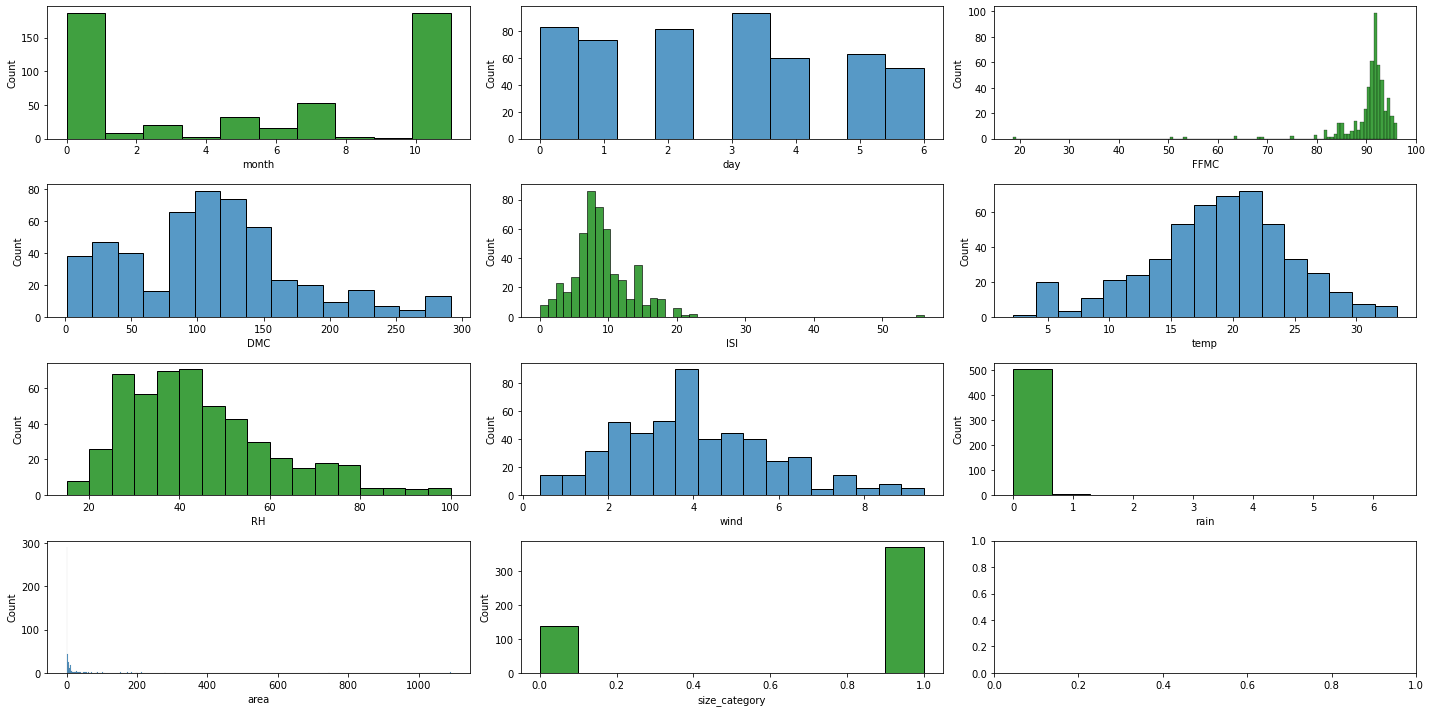

In [13]:
#Checking for the outliers using the box plot
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.histplot(forest_newdata.month,ax=ax[0,0],color='g')
sns.histplot(forest_newdata.day,ax=ax[0,1])
sns.histplot(forest_newdata.FFMC,ax=ax[0,2],color='g')
sns.histplot(forest_newdata.DMC,ax=ax[1,0])
sns.histplot(forest_newdata.ISI,ax=ax[1,1],color='g')
sns.histplot(forest_newdata.temp,ax=ax[1,2])
sns.histplot(forest_newdata.RH,ax=ax[2,0],color='g')
sns.histplot(forest_newdata.wind,ax=ax[2,1])
sns.histplot(forest_newdata.rain,ax=ax[2,2],color='g')
sns.histplot(forest_newdata.area,ax=ax[3,0])
sns.histplot(forest_newdata.size_category,ax=ax[3,1],color='g')

plt.tight_layout()

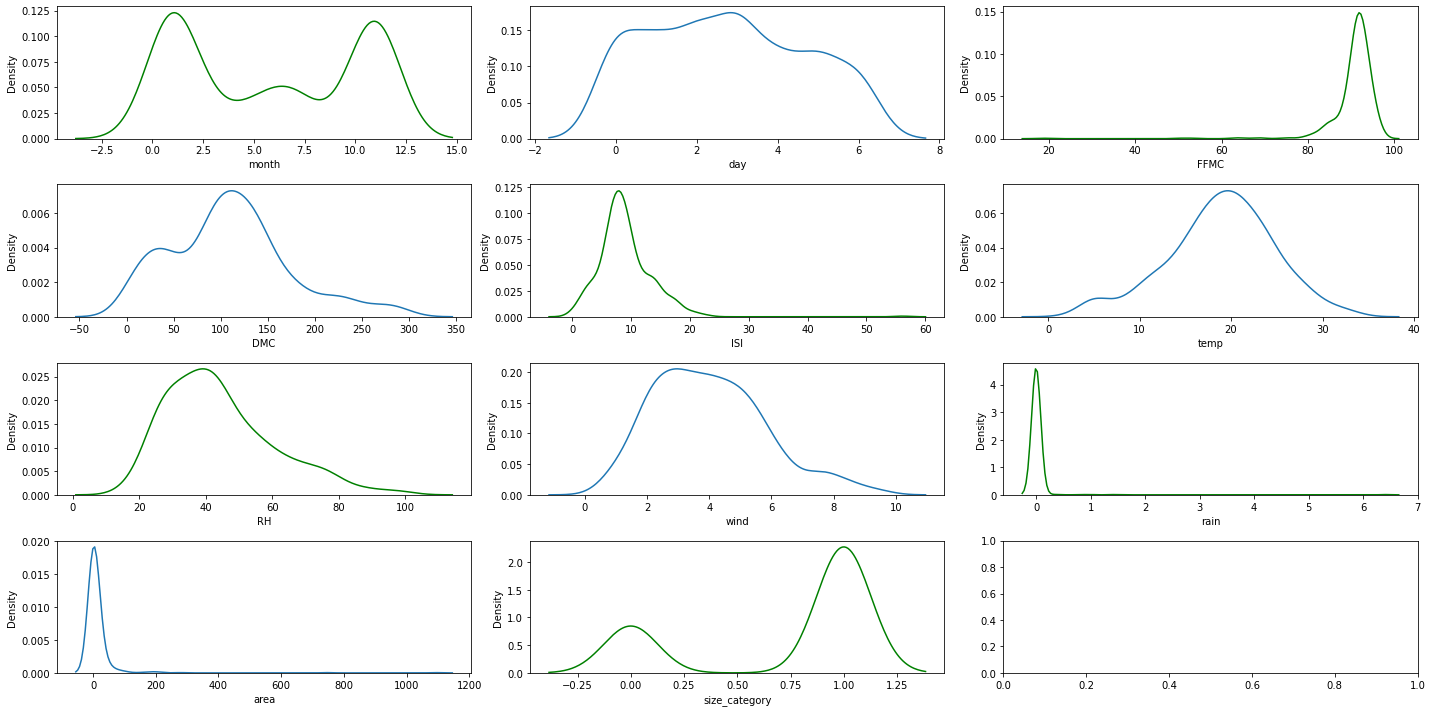

In [14]:
#Checking if the data is normally distributed or not
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.kdeplot(forest_newdata.month,ax=ax[0,0],color='g')
sns.kdeplot(forest_newdata.day,ax=ax[0,1])
sns.kdeplot(forest_newdata.FFMC,ax=ax[0,2],color='g')

sns.kdeplot(forest_newdata.DMC,ax=ax[1,0])
sns.kdeplot(forest_newdata.ISI,ax=ax[1,1],color='g')
sns.kdeplot(forest_newdata.temp,ax=ax[1,2])

sns.kdeplot(forest_newdata.RH,ax=ax[2,0],color='g')
sns.kdeplot(forest_newdata.wind,ax=ax[2,1])
sns.kdeplot(forest_newdata.rain,ax=ax[2,2],color='g')

sns.kdeplot(forest_newdata.area,ax=ax[3,0])
sns.kdeplot(forest_newdata.size_category,ax=ax[3,1],color='g')
plt.tight_layout()

In [15]:
#Assigning dependent and independent values
x= forest_newdata.iloc[:,:11]
y= forest_newdata.iloc[:,-1]

In [16]:
#Building a Sequential neural network with 11 neurons in the first layer,8 neurons in the hidden layer and 1 neuron in the output layer
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

In [17]:
#Compiling the model and using binary cross entropy as the loss function and adam as the weight optimizer
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#Fitting the model
history=model1.fit(x,y,validation_split=0.3, epochs=150, batch_size=10)

Epoch 1/150
36/36 [==============================] - 13s 35ms/step - loss: 0.5886 - accuracy: 0.7556 - val_loss: 0.6737 - val_accuracy: 0.6732
Epoch 2/150
36/36 [==============================] - 0s 5ms/step - loss: 0.5599 - accuracy: 0.7584 - val_loss: 0.6670 - val_accuracy: 0.6863
Epoch 3/150
36/36 [==============================] - 0s 5ms/step - loss: 0.5184 - accuracy: 0.7697 - val_loss: 0.5555 - val_accuracy: 0.7190
Epoch 4/150
36/36 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.7949 - val_loss: 0.4976 - val_accuracy: 0.7582
Epoch 5/150
36/36 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8034 - val_loss: 0.4619 - val_accuracy: 0.7778
Epoch 6/150
36/36 [==============================] - 0s 4ms/step - loss: 0.3778 - accuracy: 0.8455 - val_loss: 0.3858 - val_accuracy: 0.8039
Epoch 7/150
36/36 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.8652 - val_loss: 0.3914 - val_accuracy: 0.8039
Epoch 8/150

Epoch 59/150
36/36 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9916 - val_loss: 0.0638 - val_accuracy: 0.9673
Epoch 60/150
36/36 [==============================] - 0s 6ms/step - loss: 0.0369 - accuracy: 0.9916 - val_loss: 0.0777 - val_accuracy: 0.9673
Epoch 61/150
36/36 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9831 - val_loss: 0.0604 - val_accuracy: 0.9804
Epoch 62/150
36/36 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9944 - val_loss: 0.1422 - val_accuracy: 0.9477
Epoch 63/150
36/36 [==============================] - 0s 5ms/step - loss: 0.0458 - accuracy: 0.9803 - val_loss: 0.0706 - val_accuracy: 0.9673
Epoch 64/150
36/36 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9831 - val_loss: 0.0890 - val_accuracy: 0.9608
Epoch 65/150
36/36 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9719 - val_loss: 0.0644 - val_accuracy: 0.9673
Epoch 

36/36 [==============================] - 0s 5ms/step - loss: 0.0265 - accuracy: 0.9888 - val_loss: 0.0607 - val_accuracy: 0.9673
Epoch 117/150
36/36 [==============================] - 0s 7ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.1129 - val_accuracy: 0.9608
Epoch 118/150
36/36 [==============================] - 0s 6ms/step - loss: 0.0299 - accuracy: 0.9916 - val_loss: 0.0856 - val_accuracy: 0.9477
Epoch 119/150
36/36 [==============================] - 0s 7ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.0618 - val_accuracy: 0.9739
Epoch 120/150
36/36 [==============================] - 0s 6ms/step - loss: 0.0152 - accuracy: 0.9944 - val_loss: 0.0641 - val_accuracy: 0.9739
Epoch 121/150
36/36 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.9888 - val_loss: 0.0587 - val_accuracy: 0.9804
Epoch 122/150
36/36 [==============================] - 0s 6ms/step - loss: 0.0196 - accuracy: 0.9944 - val_loss: 0.0721 - val_accuracy: 0.9869
Epoch 123/150

In [19]:
#Checking for the loss function and accuracy 
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9902
accuracy: 99.02%


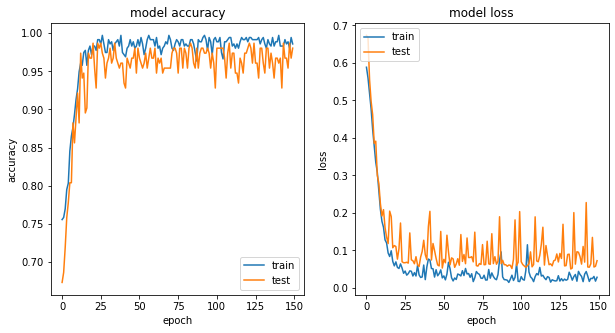

In [20]:
#Visualizing the model accuracy and model loss wrt train and test data
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(1,2,2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Insights Drawn:
>From both the plots it depicts that the neural network created has the accuracy of 97.64% with low loss of 0.0567. Hence the model classifies well for the burnt areas of forest fire.